In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv('UWRL_river_velocimetry_dataset.csv')
df = pd.read_csv('UWRL_river_velocimetry_dataset_NEW.csv')

In [3]:
df['v_pos'] =  [0 if pd.isna(x) else (-1 if x < 0 else 1) for x in df['v_x']]
df.datetime = pd.to_datetime(df.datetime)
print(df.columns)
df

Index(['datetime', 'x', 'y', 'v_x', 'v_y', 'velocity', 's2n', 'corr',
       'sun_altitude', 'sun_azimuth', 'spacial_location', 'LRO_discharge',
       'LRO_discharge_site', 'turbidity', 'vegetation', 'visibility',
       'cloudcover', 'solarradiation', 'uvindex', 'conditions', 'angle',
       'v_pos'],
      dtype='object')


,datetime,x,y,v_x,v_y,velocity,s2n,corr,sun_altitude,sun_azimuth,...,LRO_discharge_site,turbidity,vegetation,visibility,cloudcover,solarradiation,uvindex,conditions,angle,v_pos
0,2024-04-10 13:38:23,0.155,9.645,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,0
1,2024-04-10 13:38:23,0.285,9.645,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,0
2,2024-04-10 13:38:23,0.415,9.645,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,0
3,2024-04-10 13:38:23,0.545,9.645,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,0
4,2024-04-10 13:38:23,0.675,9.645,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999996,2024-04-16 06:48:12,10.815,2.495,0.249444,0.027593,0.250966,2.11600,0.35096,0.191231,1.495261,...,WaterLab,19.30,none,9.9,50.7,7,0,Partially cloudy,0.110168,1
8999997,2024-04-16 06:48:12,10.945,2.495,0.488962,0.196981,0.527149,1.96440,0.34064,0.191231,1.495261,...,WaterLab,19.30,none,9.9,50.7,7,0,Partially cloudy,0.382966,1
8999998,2024-04-16 06:48:12,11.075,2.495,0.198783,0.153478,0.251138,1.97728,0.31744,0.191231,1.495261,...,WaterLab,19.30,none,9.9,50.7,7,0,Partially cloudy,0.657490,1
8999999,2024-04-16 06:48:12,11.205,2.495,0.444174,0.226174,0.498443,2.04792,0.33272,0.191231,1.495261,...,WaterLab,19.30,none,9.9,50.7,7,0,Partially cloudy,0.470981,1


In [4]:
df['year'] = [int(x.year) for x in df.datetime]
df['month'] = [int(x.month) for x in df.datetime]
df['day'] = [int(x.day) for x in df.datetime]
df['hour'] = [int(x.hour) for x in df.datetime]

In [5]:
sunrise, sunset = [], []
for month in sorted(df.month.unique()):
    df_month = df[df.month == month]

    for day in sorted(df_month.day.unique()):
        df_day = df_month[df_month.day == day]

        times_sorted = sorted(df_day.datetime.unique())

        sunrise.append(times_sorted.pop(0))
        try:
            sunset.append(times_sorted.pop(-1))
        except:
            continue

df['sunrise_sunset'] = ['sunrise' if x in sunrise else 'sunset' if x in sunset else 'no' for x in df.datetime]

no


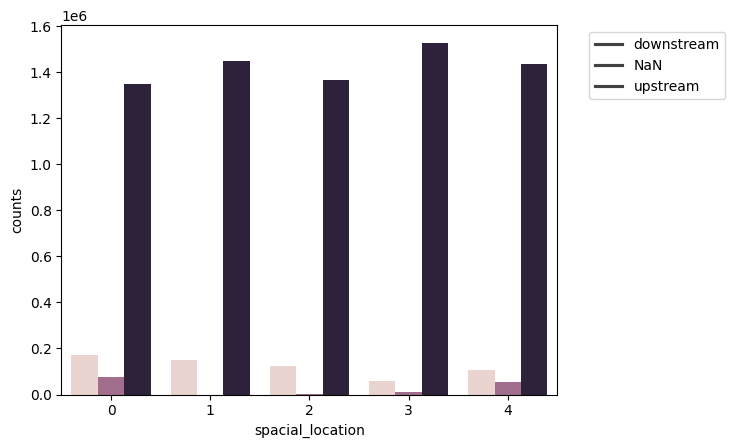

sunrise


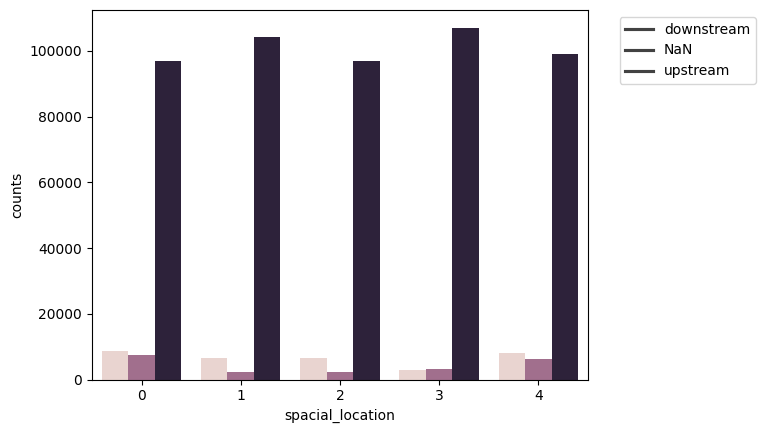

sunset


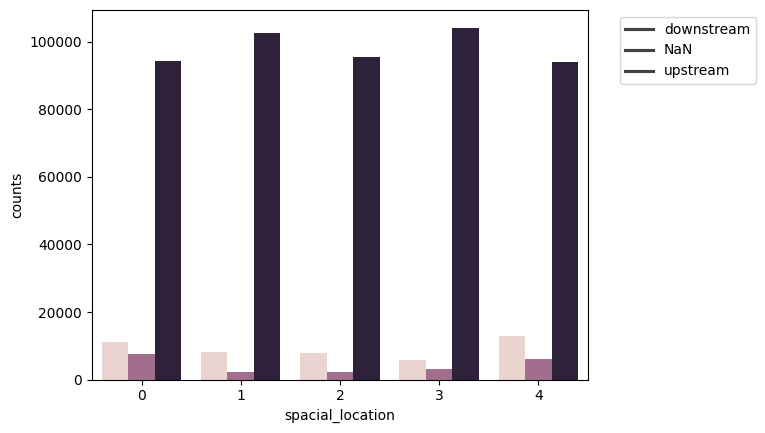

In [6]:
df_ss = df.groupby(['sunrise_sunset', 'spacial_location', 'v_pos']).size().reset_index(name='counts')

for x in df_ss.sunrise_sunset.unique():

    print(x)

    sns.barplot(
        data=df_ss[df_ss.sunrise_sunset == x],
        x='spacial_location',
        y='counts',
        hue='v_pos'
    )
    plt.legend(labels=['downstream', 'NaN', 'upstream'], bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    plt.close()


Clear


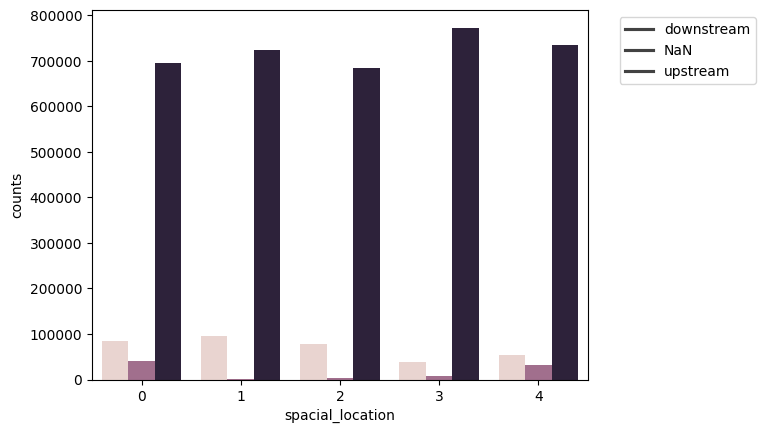

Overcast


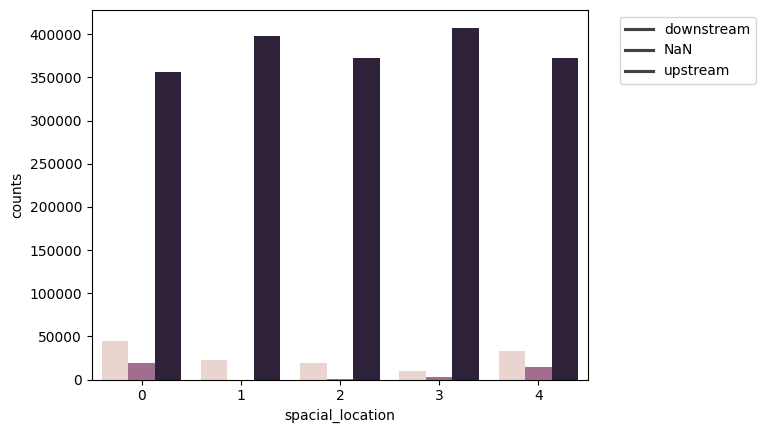

Partially cloudy


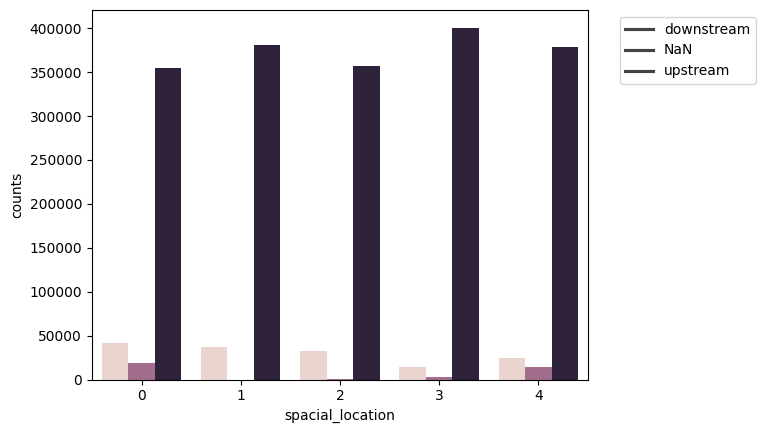

Rain, Overcast


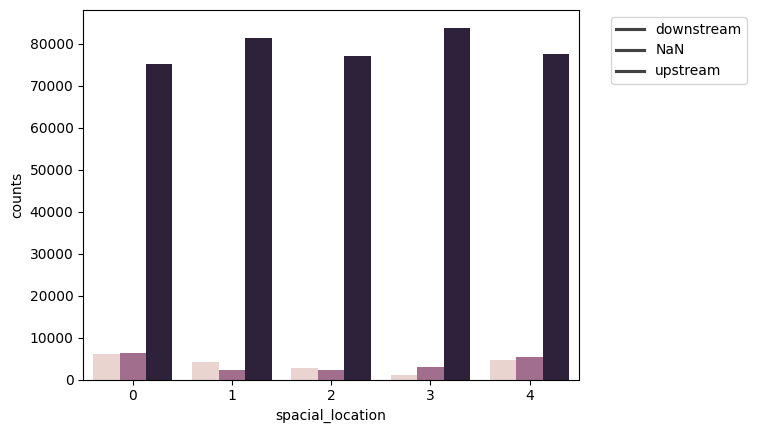

Rain, Partially cloudy


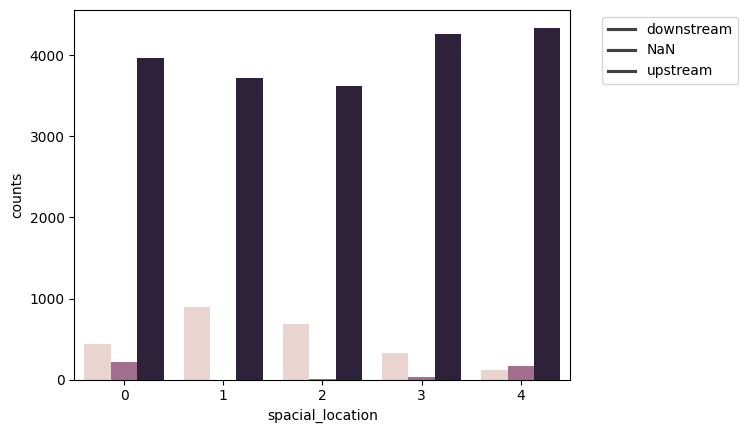

Snow, Overcast


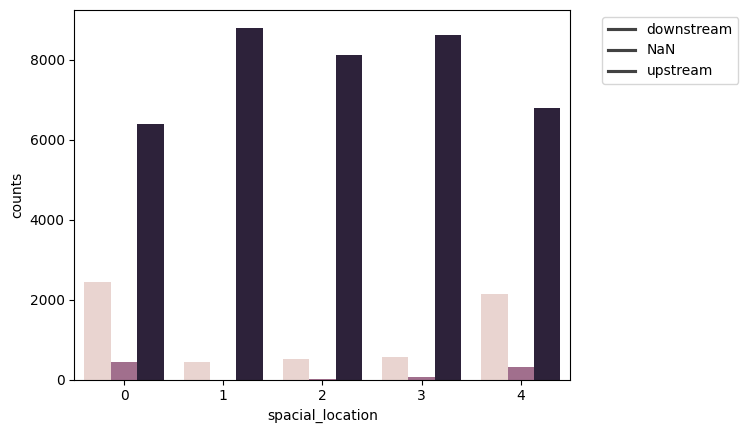

Snow, Rain, Overcast


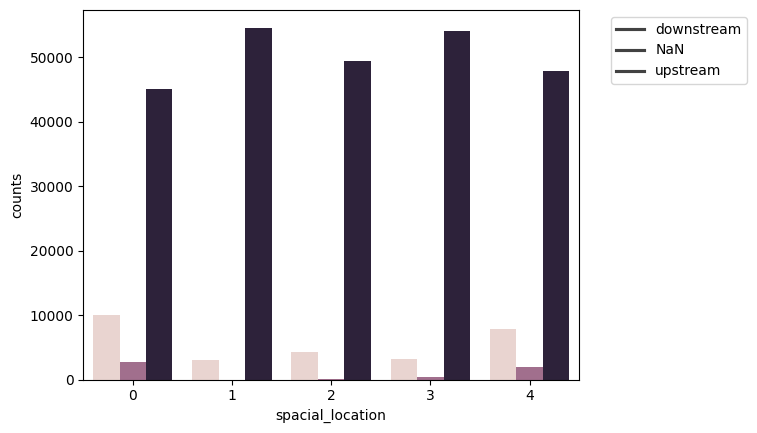

Snow, Rain, Partially cloudy


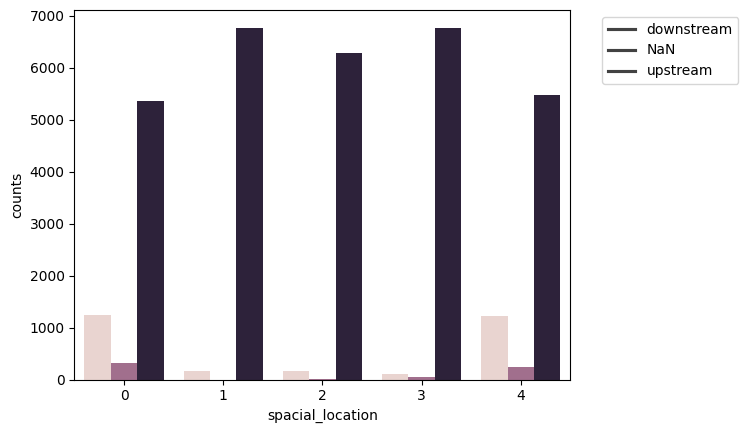

In [7]:
df_cond = df.groupby(['conditions', 'spacial_location', 'v_pos']).size().reset_index(name='counts')

for x in df_cond.conditions.unique():

    print(x)

    sns.barplot(
        data=df_cond[df_cond.conditions == x],
        x='spacial_location',
        y='counts',
        hue='v_pos'
    )
    plt.legend(labels=['downstream', 'NaN', 'upstream'], bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    plt.close()
